In [1]:
# alttaki satırı çalıştır
# !pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install  
# (extension yükleme)
# https://towardsdatascience.com/jupyter-notebook-extensions-517fa69d2231

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Makine Öğrenmesi : Doğrusal Regresyon


![image.png](dogrusalresim/logo.png)

## Tek Değişkenli Doğrusal Regresyon 
 

### Model Gösterimi



In [3]:
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
eğitim_verisi=pd.read_csv("data/train.csv")

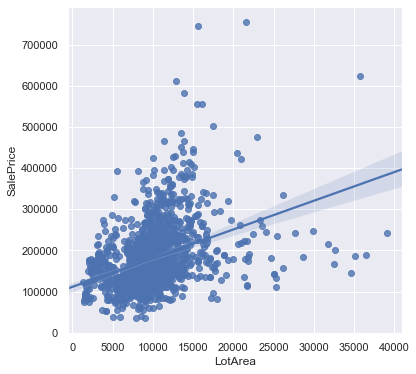

In [5]:
sns.set(rc={'figure.figsize':(6,6)});ax = sns.regplot(x="LotArea", y="SalePrice", data=eğitim_verisi.loc[eğitim_verisi.LotArea<40000])
 


**Gözetimli Öğrenme** : Verideki her bir örnek için doğru cevap verir.

**Regresyon problemi** : Gerçek değerli çıktıyı tahmin etmek.


**Sınıflandırma** : Kesikli değer çıktıları
 

In [6]:
# Konut fiyatları için eğitim seti

eğitim_verisi.rename(columns={"LotArea":"Konut_Boyutu","SalePrice":"Konut_Fiyat"},inplace=True)

eğitim_verisi[["Konut_Boyutu","Konut_Fiyat"]].head(4)

,Konut_Boyutu,Konut_Fiyat
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000


### Notasyon



**m** : Eğitim verisindeki örnek adedi
 
**x**: Girdi değişkenleri
 
**y**: Çıktı değişkeni

**q**: Katsayı

**h**: Hipotez

**(x, y)** – eğitim verisi

**x (i), y(i)** - i. eğitim verisi



In [7]:
eğitim_verisi.loc[0,["Konut_Boyutu","Konut_Fiyat"]] # 0. index

Konut_Boyutu      8450
Konut_Fiyat     208500
Name: 0, dtype: object

In [8]:
eğitim_verisi.loc[1,["Konut_Boyutu","Konut_Fiyat"]] # 1. index

Konut_Boyutu      9600
Konut_Fiyat     181500
Name: 1, dtype: object

In [9]:
x=eğitim_verisi["Konut_Boyutu"]

In [10]:
y=eğitim_verisi["Konut_Fiyat"]

In [11]:
print("x0:",x[0],"y0;",y[0])

x0: 8450 y0; 208500


In [12]:
# not : Python'da index 0'dan başlar. 

![title](dogrusalresim/Model_Gösterimi.png)

   <p style="font-size:120%;">  h'yi nasıl göstereceğiz ?     </p> 

   <p style="font-size:120%;"> Hipotez :   $h_0(x)=  \theta_0 + \theta_1*x$     </p> 
 

   <p style="font-size:100%;">  Tek değişkenli (univariate) doğrusal regresyon  </p> 

Girdiler(x): [1 2 3] , Tahminler(h): [0.5 1.  1.5]


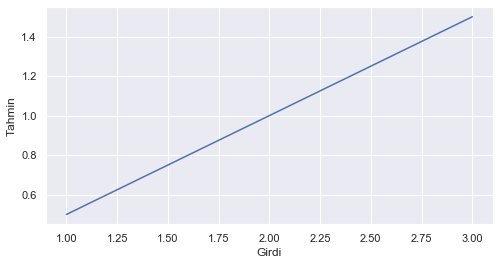

In [13]:
theta0=0; theta1=0.5; x=np.array([1,2,3]) ;  h=theta0+theta1*x
print("Girdiler(x):",x, ", Tahminler(h):",h);  plt.figure(figsize=(8,4));  plt.xlabel("Girdi");  plt.ylabel("Tahmin");  plt.plot(x,h)

### Maliyet (bedel) Fonksiyonu


In [14]:
# EĞİTİM VERİSİ
eğitim_verisi[["Konut_Boyutu","Konut_Fiyat"]].head(4)

,Konut_Boyutu,Konut_Fiyat
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000


In [15]:
eğitim_verisi.shape[0]  # m : Eğitim verisi sayısı

1460

   <p style="font-size:120%;"> Hipotez :   $h_0(x)=  \theta_0 + \theta_1*x$     </p> 

<p style="font-size:100%;"> "$\theta_i$" Katsayılar Nasıl Seçilecek ?   </p>


<p style="font-size:100%;"> Durum 1:   $\theta_0$ = 1.5  ve $\theta_1$ = 0 </p>


Girdiler(x): [1 2 3] , Tahminler(h): [1.5 1.5 1.5]


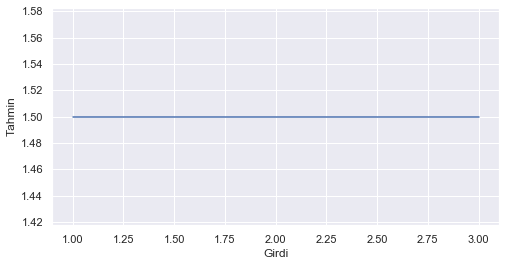

In [16]:
## Durum 1 

theta0=1.5 ;theta1=0 ; x=np.array([1,2,3]) ; h=theta0+theta1*x
print("Girdiler(x):",x, ", Tahminler(h):",h)
plt.figure(figsize=(8,4)); plt.xlabel("Girdi") ;plt.ylabel("Tahmin") ;plt.plot(x,h)

<p style="font-size:100%;">  Durum 2 : $\theta_0$ = 0 ve $\theta_1$ = 0.5  </p>
 

Girdiler(x): [1 2 3] , Tahminler(h): [0.5 1.  1.5]


(0, 1.55)

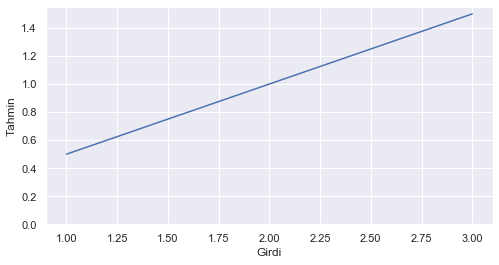

In [17]:
## Durum 2 
theta0=0 ; theta1=0.5 ; x=np.array([1,2,3]) ; h=theta0+theta1*x
print("Girdiler(x):",x, ", Tahminler(h):",h)
plt.figure(figsize=(8,4)); plt.xlabel("Girdi") ;plt.ylabel("Tahmin") ;plt.plot(x,h);  plt.ylim(bottom=0)

<p style="font-size:100%;"> $\theta_0$ = 1   </p>

<p style="font-size:100%;"> $\theta_1$ = 0.5 </p>

Girdiler(x): [1 2 3] , Tahminler(h): [1.5 2.  2.5]


(0, 2.55)

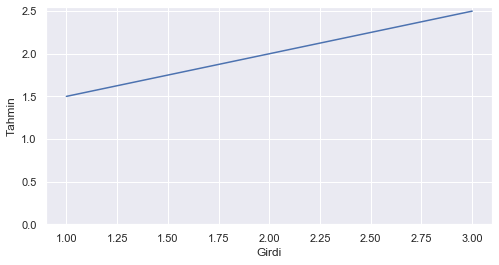

In [18]:
## Durum 3 

theta0=1 ; theta1=0.5 ; x=np.array([1,2,3]) ; h=theta0+theta1*x
print("Girdiler(x):",x, ", Tahminler(h):",h)
plt.figure(figsize=(8,4)); plt.xlabel("Girdi") ;plt.ylabel("Tahmin") ;plt.plot(x,h) ;plt.ylim(bottom=0)

Fikir : $ \theta_0 ,  \theta_1 $ öyle seçmeliyiz ki, $ h_0(x) $ eğitim verimiz(x,y) için y'ye yakın olmalıdır

Girdiler(x): [0 1 2 3] , Tahminler(h): [0 1 2 3]


(0, 3.465)

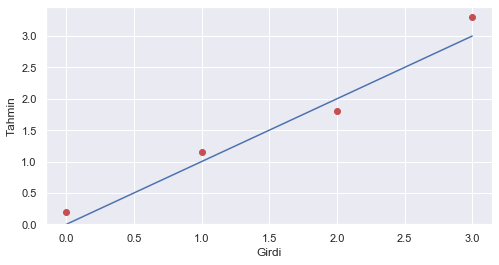

In [19]:
theta0=0 ; theta1=1 ; x=np.array([0,1,2,3]) ; y=np.array([0.2,1.15,1.8,3.3]) ; h=theta0+theta1*x
print("Girdiler(x):",x, ", Tahminler(h):",h)
plt.figure(figsize=(8,4)) ; plt.xlabel("Girdi") ; plt.ylabel("Tahmin") ; plt.plot(x,h) ; plt.plot(x,y,"ro") ; plt.ylim(bottom=0)

### Maliyet (bedel) Fonksiyonu Çıkarım I


<p style="font-size:120%;"> Hipotez :   $h_0(x)=  \theta_0 + \theta_1*x$     </p> 

<p style="font-size:120%;"> Katsayılar :     $ \theta_0 , \theta_1    $   </p>   

<p style="font-size:120%;"> Bedel fonksiyonu  :  $ j=(1/2m)\sum\limits_{i=1}^{m} (h-y)^2 $ </p>  

<p style="font-size:120%;"> Amaç : $ minimize:J( \theta_0 , \theta_1) <- (\theta_0 , \theta_1)  $    </p>




In [20]:
theta0=0 ; theta1= 1

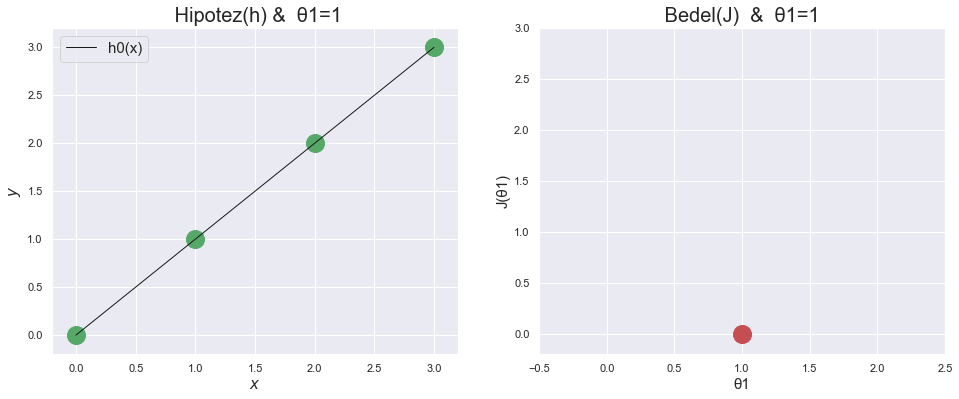

In [21]:
# h0(x)
x=np.array([0,1,2,3]) ;y=np.array([0,1,2,3]) ; h=theta0+theta1*x ;m=x.shape[0] ; j=(1/(2*m))*np.sum(np.square(h-y))
plt.figure(figsize=(16,6))    
plt.subplot(121)
plt.title(" Hipotez(h) &  θ1={Q}".format(Q=theta1),fontsize="20") ;plt.ylabel("$y$",fontsize=15) ;plt.xlabel("$x$",fontsize=15) ;plt.plot(x, y, 'go',linewidth=1,markersize=18)
plt.plot(x, h, 'k-',linewidth=1,markersize=18,label="h0(x)") ;plt.legend(loc='best',fontsize=15) ;plt.axis([-0.2, 3.2, -0.2, 3.2])
# j(q1)
plt.subplot(122);plt.title(" Bedel(J)  &  θ1={Q} ".format(Q=theta1),fontsize="20");plt.ylabel("J(θ1)",fontsize=15) ;plt.xlabel("θ1",fontsize=15)
plt.plot([theta1], [j], 'ro',linewidth=1,markersize=18);plt.axis([-0.5, 2.5, -0.2, 3]); plt.show()

In [22]:
theta0=0;theta1= .5 

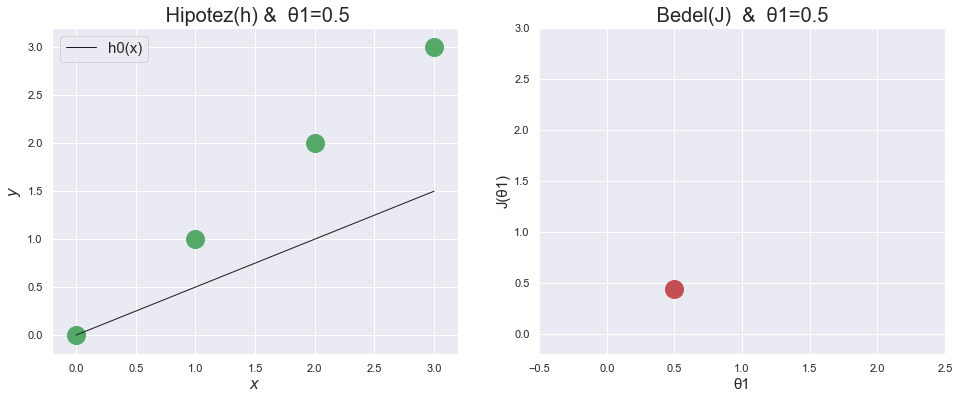

In [23]:
# h0(x)
theta0=0;theta1= .5 ; x=np.array([0,1,2,3]) ;y=np.array([0,1,2,3]) ; h=theta0+theta1*x ;m=x.shape[0] ; j=(1/(2*m))*np.sum(np.square(h-y))
plt.figure(figsize=(16,6))    
plt.subplot(121)
plt.title(" Hipotez(h) &  θ1={Q}".format(Q=theta1),fontsize="20") ;plt.ylabel("$y$",fontsize=15) ;plt.xlabel("$x$",fontsize=15) ;plt.plot(x, y, 'go',linewidth=1,markersize=18)
plt.plot(x, h, 'k-',linewidth=1,markersize=18,label="h0(x)") ;plt.legend(loc='best',fontsize=15) ;plt.axis([-0.2, 3.2, -0.2, 3.2])
# j(q1)
plt.subplot(122);plt.title(" Bedel(J)  &  θ1={Q} ".format(Q=theta1),fontsize="20");plt.ylabel("J(θ1)",fontsize=15) ;plt.xlabel("θ1",fontsize=15)
plt.plot([theta1], [j], 'ro',linewidth=1,markersize=18);plt.axis([-0.5, 2.5, -0.2, 3]); plt.show()

In [24]:
# h0(x)
theta_list=np.arange( -0.5, 3,0.5)
j_list=[]
for theta1 in theta_list:
    theta0=0
    x=np.array([0,1,2,3])
    y=np.array([0,1,2,3])
    h=theta0+theta1*x
    m=x.shape[0]
    j=(1/(2*m))*np.sum(np.square(h-y))
    j_list.append(j)

[-0.2, 3.2, -0.2, 3.2]

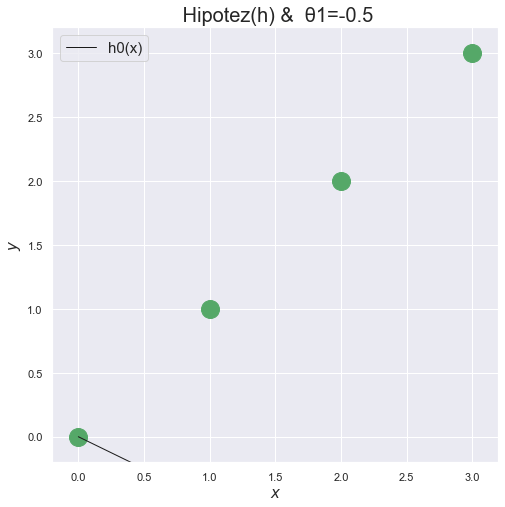

In [25]:
#
theta1=theta_list[0];
x=np.array([0,1,2,3]); y=np.array([0,1,2,3]); h=theta0+theta1*x
plt.figure(figsize=(8,8)) ;plt.title(" Hipotez(h) &  θ1={Q}".format(Q=theta1),fontsize="20")
plt.ylabel("$y$",fontsize=15);plt.xlabel("$x$",fontsize=15);plt.plot(x, y, 'go',linewidth=1,markersize=18);plt.plot(x, h, 'k-',linewidth=1,markersize=18,label="h0(x)")
plt.legend(loc='best',fontsize=15);plt.axis([-0.2, 3.2, -0.2, 3.2])

[-0.2, 3.2, -0.2, 3.2]

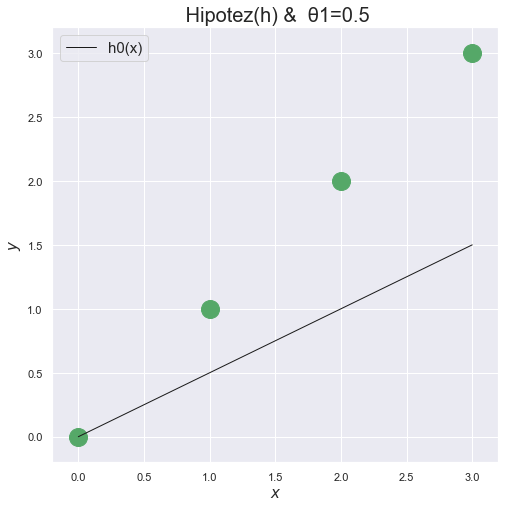

In [26]:
#
theta1=theta_list[2] ; x=np.array([0,1,2,3]); y=np.array([0,1,2,3]); h=theta0+theta1*x
plt.figure(figsize=(8,8)) ;plt.title(" Hipotez(h) &  θ1={Q}".format(Q=theta1),fontsize="20")
plt.ylabel("$y$",fontsize=15);plt.xlabel("$x$",fontsize=15);plt.plot(x, y, 'go',linewidth=1,markersize=18);plt.plot(x, h, 'k-',linewidth=1,markersize=18,label="h0(x)")
plt.legend(loc='best',fontsize=15);plt.axis([-0.2, 3.2, -0.2, 3.2])

[-0.2, 3.2, -0.2, 3.2]

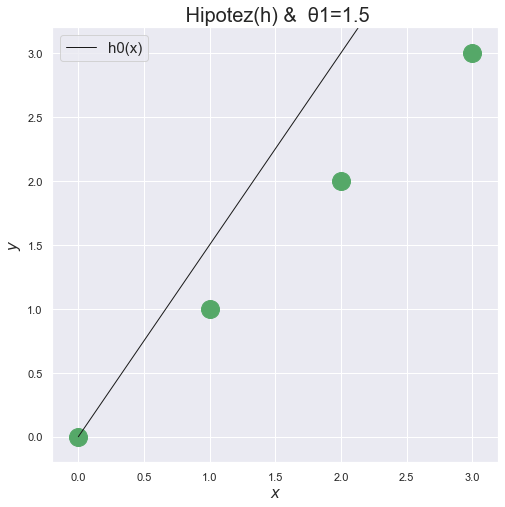

In [27]:
#
theta1=theta_list[4]; x=np.array([0,1,2,3]); y=np.array([0,1,2,3]); h=theta0+theta1*x
plt.figure(figsize=(8,8)) ;plt.title(" Hipotez(h) &  θ1={Q}".format(Q=theta1),fontsize="20")
plt.ylabel("$y$",fontsize=15);plt.xlabel("$x$",fontsize=15);plt.plot(x, y, 'go',linewidth=1,markersize=18);plt.plot(x, h, 'k-',linewidth=1,markersize=18,label="h0(x)")
plt.legend(loc='best',fontsize=15);plt.axis([-0.2, 3.2, -0.2, 3.2])

[-0.2, 3.2, -0.2, 3.2]

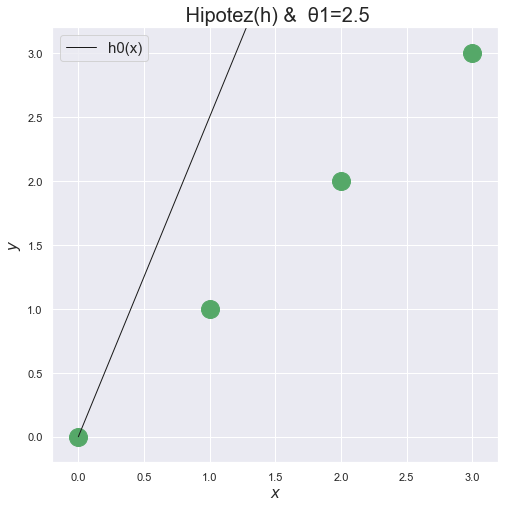

In [28]:
#
theta1=theta_list[-1] ; x=np.array([0,1,2,3]); y=np.array([0,1,2,3]); h=theta0+theta1*x
plt.figure(figsize=(8,8)) ;plt.title(" Hipotez(h) &  θ1={Q}".format(Q=theta1),fontsize="20")
plt.ylabel("$y$",fontsize=15);plt.xlabel("$x$",fontsize=15);plt.plot(x, y, 'go',linewidth=1,markersize=18);plt.plot(x, h, 'k-',linewidth=1,markersize=18,label="h0(x)")
plt.legend(loc='best',fontsize=15);plt.axis([-0.2, 3.2, -0.2, 3.2])

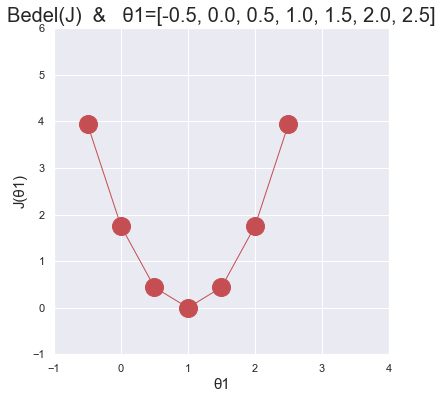

In [29]:
# j(q1)
plt.title("Bedel(J)  &   θ1={Q}".format(Q=theta_list.tolist()),fontsize="20")
plt.ylabel("J(θ1)",fontsize=15);plt.xlabel("θ1",fontsize=15);plt.plot(theta_list, j_list, 'ro-',linewidth=1,markersize=18);plt.axis([-1, 4, -1, 6]);plt.show()

<p style="font-size:100%;"> En düşük bedel :  $\theta_1$ = 1  için gerçekleşti. </p>

In [30]:
grafik_verisi=eğitim_verisi.loc[eğitim_verisi.Konut_Boyutu<40000,["Konut_Boyutu","Konut_Fiyat"]]

### Maliyet (bedel) Fonksiyonu Çıkarım II


<p style="font-size:120%;"> Hipotez :   $h_0(x)=  \theta_0 + \theta_1*x$     </p> 

<p style="font-size:120%;"> Katsayılar :     $ \theta_0 , \theta_1    $   </p>   

<p style="font-size:120%;"> Bedel fonksiyonu  :  $ J_{(\theta_0 , \theta_1)}=(1/2m)\sum\limits_{i=1}^{m} (h_0(x^{(i)})-y^{(i)})^2 $ </p>  

<p style="font-size:120%;"> Amaç : $ minimize:J_{(\theta_0 , \theta_1)}  $    </p>


<p style="font-size:120%;" > $ \theta_0=50000$ ve $\theta_1=12$ dir </p>
<p style="font-size:120%;" >  $h=50000+12*x$ </p>



In [31]:
h=50000+12*grafik_verisi.Konut_Boyutu 

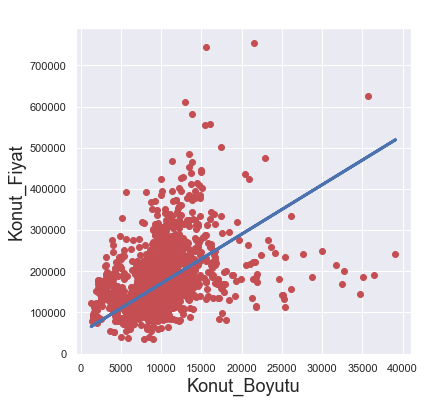

In [32]:
#
plt.title("  ",fontsize="20");plt.ylabel("Konut_Fiyat",fontsize=18);
plt.xlabel("Konut_Boyutu",fontsize=18);plt.plot(grafik_verisi.Konut_Boyutu, grafik_verisi.Konut_Fiyat, 'ro', markersize=6) 
plt.plot(grafik_verisi.Konut_Boyutu, h, 'b-',linewidth=3, markersize=6);plt.show()

In [33]:
j=(1/(2*m))*np.sum(np.square(h-grafik_verisi.Konut_Fiyat))
print("Bedel miktarı {bedel}".format(bedel=j))
def bedel(X,y,theta):
    
    m=y.shape[0]
    j=(1/(2*m))*np.sum(np.array(np.square(np.dot(X,theta)-y)))    
    
    return j

Bedel miktarı 1061984336203.25


 

![title](dogrusalresim/contour.png)

In [34]:
y=grafik_verisi[["Konut_Fiyat"]]
x=grafik_verisi[["Konut_Boyutu"]]

In [35]:
def girdi(x):
    x_new=x.copy()
    x0=[1]*x_new.shape[0]
    x_new["Yanlılık(x0)"]=x0
    girdi_listesi=x_new.columns.tolist()
    girdi_listesi.remove("Yanlılık(x0)")
    girdi_listesi.insert(0,"Yanlılık(x0)")
    x_new = x_new.reindex(columns=girdi_listesi)
    return x_new

In [36]:
x_=girdi(x)
theta0_vals = np.linspace(-660000, 900000, 80)
theta1_vals = np.linspace(-60,75, 80)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
 
for i in np.arange(theta0_vals.size):
    for j in np.arange(theta1_vals.size):
        t =pd.DataFrame( np.array([theta0_vals[i], theta1_vals[j]]))
        J_vals[i, j] = bedel(x_,y,t )
 

In [37]:
theta0=50000
theta1=12

In [38]:
h=theta0+theta1*x

Text(0, 0.5, '$\\theta_1$')

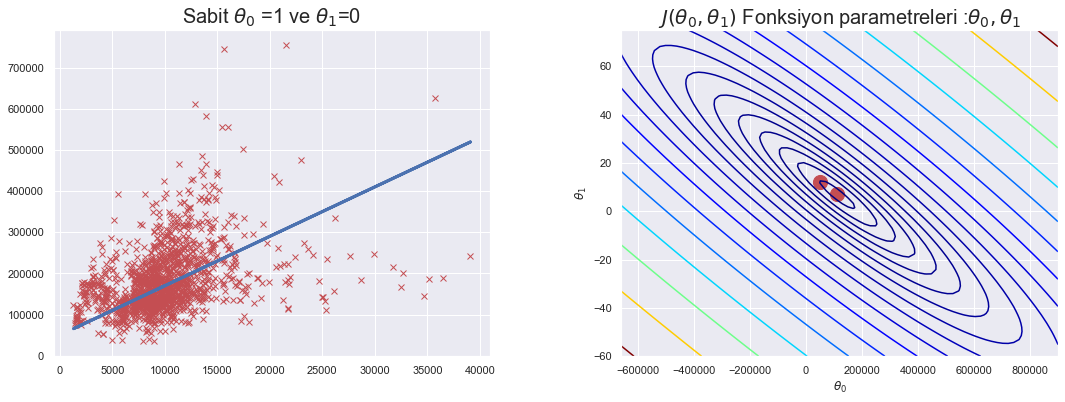

In [39]:
#
fig = plt.figure(figsize=(18, 6));fig.subplots_adjust(wspace=0.3);ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122);ax1.set_title("Sabit "+r'$\theta_0$'+" ={Q0}".format(Q0=1)+" ve " + r'$\theta_1$'+"={Q1}".format(Q0=1,Q1=0) ,fontsize="20")
ax1.plot(x, y, 'rx', markersize=6);ax1.plot(x, h, 'b-',linewidth=3, markersize=6)    
theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)  # Contour plot:
ax2.set_title(r'$J(\theta_0,\theta_1)$'+ " Fonksiyon parametreleri :"+r'$ \theta_0,\theta_1$',fontsize="20");ax2.contour( theta0, theta1, J_vals.T, np.logspace(9,12, 20),  cmap='jet')
ax2.scatter([50000,111589.1912902882] , [12,6.97136512], marker='o', color='r', s=200 );ax2.set_xlabel(r'$\theta_0$');ax2.set_ylabel(r'$\theta_1$')

### Dereceli Azaltma 

<p style="font-size:120%;"> Bir bedel fonskiyonumuz var.  : $ J_{(\theta_0 , \theta_1)}$    </p> 
<p style="font-size:120%;"> İsteğimiz : $ minimize:J_{(\theta_0 , \theta_1)}  $    </p>
<p style="font-size:120%;"> Sonuç olarak  :   </p>
<p style="font-size:120%;"> Bazı   $   \theta_0 , \theta_1    $ değerleri ile başla ve bunları değiştirerek  $J_{(\theta_0 , \theta_1)}  $'u düşürmeye devam et. $J_{(\theta_0 , \theta_1)}  $ Minumum değerine ulaşana kadar  bunu tekrarla.    </p>


 

 

![title](dogrusalresim/contour_1.png)

 

![title](dogrusalresim/contour_2.png)

### Dereceli Azaltma Algoritması

<p style="font-size:100%;">   $j=0$ ve $j=1$ için yakınsayana kadar tekrar et :  </p>

<p style="font-size:150%;">   \begin{equation}\     \theta_j := \theta_j-a*\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_j} \end{equation} </p>

<p style="font-size:100%;"> Aynı anda   $temp0=\theta_0$ ve $temp1=\theta_1$ atanır.    </p> 

<p style="font-size:120%;">\begin{equation}\  temp0 := \theta_0-a*\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_0} \end{equation}</p>

<p style="font-size:120%;">\begin{equation}\  temp1 := \theta_1-a*\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_1} \end{equation}</p>

### Dereceli Azaltma Çıkarım

<p style="font-size:110%;">$ Öğrenme Hızı : a$</p> 

<p style="font-size:110%;">   \begin{equation}\     \theta_j := \theta_j-a*\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_j} \end{equation} </p>

<p style="font-size:110%;">   \begin{equation}\    Türev:\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_j} \end{equation} </p>

Negatif eğim ve pozitif eğim nerelerdedir ?


![title](dogrusalresim/bedelABC.png)

<p style="font-size:110%;">   \begin{equation}\ A: \    0<\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_j}  \end{equation}  </p> 
<p style="font-size:110%;">   \begin{equation}\ B: \    0 >\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_j}  \end{equation}  </p> 
<p style="font-size:110%;">   \begin{equation}\ C: \    0=\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_j}  \end{equation}  </p> 

Eğer α değeri çok küçük olursa, dereceli azalım çok yavaş olabilir.
 

![image.png](dogrusalresim/bedelinis.png)

Eğer α değeri çok büyük olursa, dereceli azalım minimumu aşabilir.
Yakınsama, hatta ayrışma başarısız olabilir. 


![image.png](dogrusalresim/bedelsapıtma.png)

<p style="font-size:120%;">\begin{equation}\  \theta_1 := \theta_1-a*\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_1} \end{equation}</p>

![image.png](dogrusalresim/localopt.png)

Öğrenim hızı sabit olduğu halde dereceli azalma lokal minimuma yakınsayabilir. Lokal minumuma yaklaştıkca derece miktarı daha düşer. Bu küçük adımlara neden olur. Bu yüzden öğrenme hızını düşürmeye gerek yoktur. 

![image.png](dogrusalresim/tersinis.png)

### Doğrusal Regresyon için Dereceli Azaltma  

<p style="font-size:100%;">   $j=0$ ve $j=1$ için yakınsayana kadar tekrar et :  </p>
<p style="font-size:150%;">   \begin{equation}\     \theta_j := \theta_j-a*\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_j} \end{equation} </p>


<p style="font-size:120%;">     Doğrusal Regresyon Model :    </p> 
<p style="font-size:120%;">    $h_0(x)=  \theta_0 + \theta_1*x$     </p> 
 

<p style="font-size:120%;"> Bedel fonksiyonu  :   $ J_{(\theta_0 , \theta_1)}=(1/2m)\sum\limits_{i=1}^{m} (h_0(x^{(i)})-y^{(i)})^2 $  </p>  

 

<p style="font-size:110%;">   \begin{equation}\ j=0  : \frac{\partial J(\theta_0,\theta_1)}{\partial \theta_0} =1/m \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})) \end{equation} </p>
<p style="font-size:110%;">   \begin{equation}\ j=1  : \frac{\partial J(\theta_0,\theta_1)}{\partial \theta_1} =1/m \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}))*x^{(i)} \end{equation} </p>

<p style="font-size:110%;">    Dereceli Azaltma Algoritması  </p>
<p style="font-size:110%;">    $\theta_0$ ve $\theta_1$ yakınsayana kadar aynı anda güncellenir.  </p>
<p style="font-size:110%;">   \begin{equation}\     \theta_0 := \theta_0-a*\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_0} =1/m \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})) \end{equation} </p>
<p style="font-size:110%;">    \begin{equation}\     \theta_1 := \theta_1-a*\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_1} =1/m \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}))*x^{(i)} \end{equation} </p>

![image.png](dogrusalresim/local2.png)

![image.png](dogrusalresim/local3.png)

![image.png](dogrusalresim/local4.png)

In [40]:
t0_list=[]   #  600000 500000 400000 300000 200000  111589  
t1_list=[]      # -50    -40    -30     -15    -5  6.97

Text(0, 0.5, '$\\theta_1$')

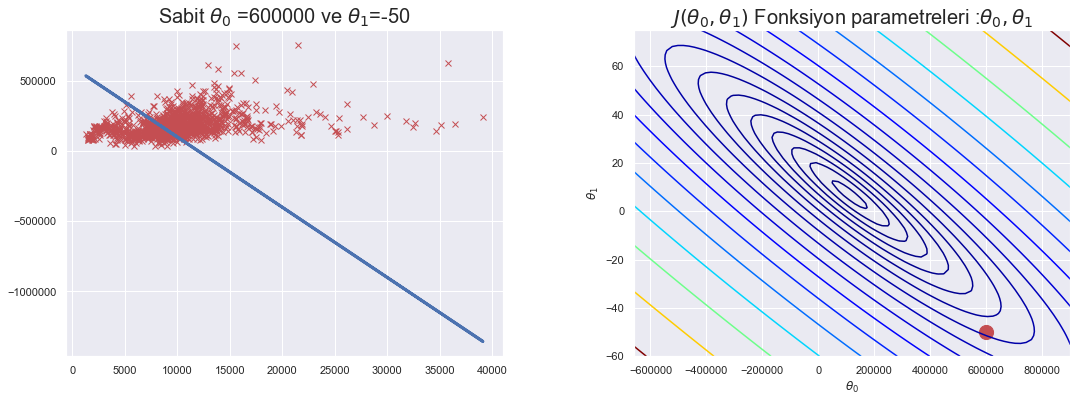

In [41]:
#
y=grafik_verisi[["Konut_Fiyat"]];x=grafik_verisi[["Konut_Boyutu"]];fig = plt.figure(figsize=(18, 6))
fig.subplots_adjust(wspace=0.3);ax1= fig.add_subplot(121);ax2 = fig.add_subplot(122)
t0=600000;t1=-50;t0_list.append(t0);t1_list.append(t1);ax1.set_title("Sabit "+r'$\theta_0$'+" ={Q0}".format(Q0=t0)+" ve " + r'$\theta_1$'+"={Q1}".format(Q1=t1) ,fontsize="20")
h=t0+t1*x;ax1.plot(x, y, 'rx', markersize=6);ax1.plot(x, h, 'b-',linewidth=3, markersize=6)    ;theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals) # Contour plot:
ax2.set_title(r'$J(\theta_0,\theta_1)$'+ " Fonksiyon parametreleri :"+r'$ \theta_0,\theta_1$',fontsize="20")
ax2.contour( theta0, theta1, J_vals.T, np.logspace(9,12, 20),  cmap='jet');ax2.scatter(t0_list , t1_list, marker='o', color='r', s=200 );ax2.set_xlabel(r'$\theta_0$');ax2.set_ylabel(r'$\theta_1$')

Text(0, 0.5, '$\\theta_1$')

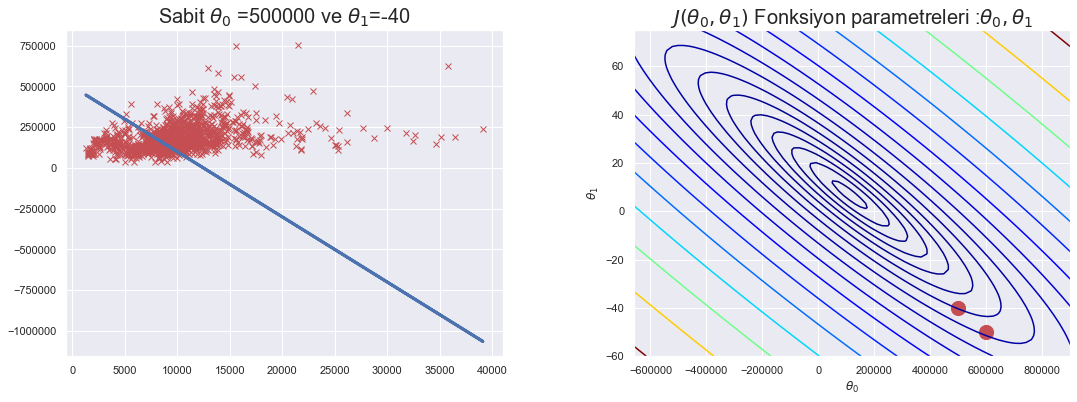

In [42]:
#
y=grafik_verisi[["Konut_Fiyat"]];x=grafik_verisi[["Konut_Boyutu"]];fig = plt.figure(figsize=(18, 6))
fig.subplots_adjust(wspace=0.3);ax1= fig.add_subplot(121);ax2 = fig.add_subplot(122)
t0=500000;t1=-40;t0_list.append(t0);t1_list.append(t1);ax1.set_title("Sabit "+r'$\theta_0$'+" ={Q0}".format(Q0=t0)+" ve " + r'$\theta_1$'+"={Q1}".format(Q1=t1) ,fontsize="20")
h=t0+t1*x;ax1.plot(x, y, 'rx', markersize=6);ax1.plot(x, h, 'b-',linewidth=3, markersize=6)    ;theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals) # Contour plot:
ax2.set_title(r'$J(\theta_0,\theta_1)$'+ " Fonksiyon parametreleri :"+r'$ \theta_0,\theta_1$',fontsize="20")
ax2.contour( theta0, theta1, J_vals.T, np.logspace(9,12, 20),  cmap='jet');ax2.scatter(t0_list , t1_list, marker='o', color='r', s=200 );ax2.set_xlabel(r'$\theta_0$');ax2.set_ylabel(r'$\theta_1$')

Text(0, 0.5, '$\\theta_1$')

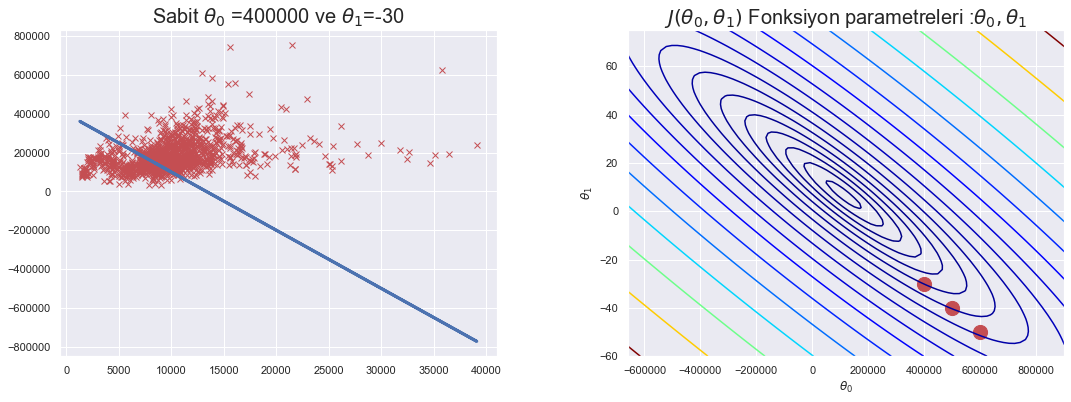

In [43]:
#
y=grafik_verisi[["Konut_Fiyat"]];x=grafik_verisi[["Konut_Boyutu"]];fig = plt.figure(figsize=(18, 6))
fig.subplots_adjust(wspace=0.3);ax1= fig.add_subplot(121);ax2 = fig.add_subplot(122)
t0=400000;t1=-30;t0_list.append(t0);t1_list.append(t1);ax1.set_title("Sabit "+r'$\theta_0$'+" ={Q0}".format(Q0=t0)+" ve " + r'$\theta_1$'+"={Q1}".format(Q1=t1) ,fontsize="20")
h=t0+t1*x;ax1.plot(x, y, 'rx', markersize=6);ax1.plot(x, h, 'b-',linewidth=3, markersize=6)    ;theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals) # Contour plot:
ax2.set_title(r'$J(\theta_0,\theta_1)$'+ " Fonksiyon parametreleri :"+r'$ \theta_0,\theta_1$',fontsize="20")
ax2.contour( theta0, theta1, J_vals.T, np.logspace(9,12, 20),  cmap='jet');ax2.scatter(t0_list , t1_list, marker='o', color='r', s=200 );ax2.set_xlabel(r'$\theta_0$');ax2.set_ylabel(r'$\theta_1$')

Text(0, 0.5, '$\\theta_1$')

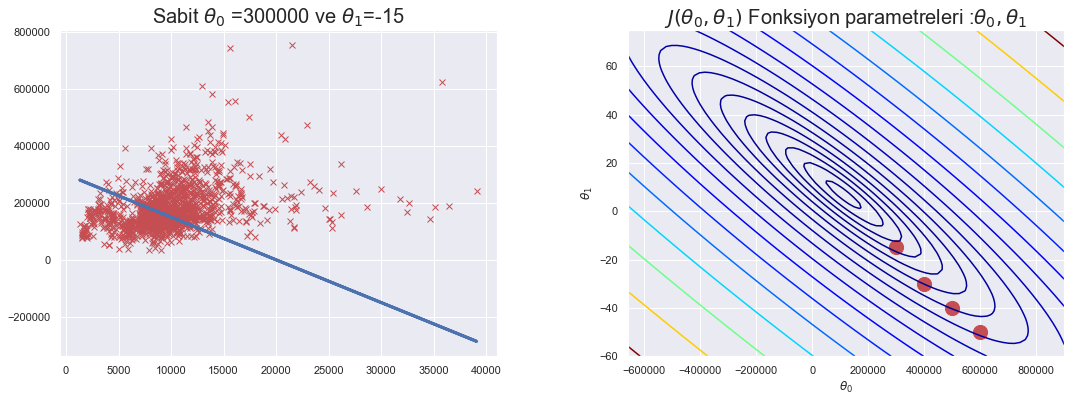

In [44]:
#
y=grafik_verisi[["Konut_Fiyat"]];x=grafik_verisi[["Konut_Boyutu"]];fig = plt.figure(figsize=(18, 6))
fig.subplots_adjust(wspace=0.3);ax1= fig.add_subplot(121);ax2 = fig.add_subplot(122)
t0=300000;t1=-15;t0_list.append(t0);t1_list.append(t1);ax1.set_title("Sabit "+r'$\theta_0$'+" ={Q0}".format(Q0=t0)+" ve " + r'$\theta_1$'+"={Q1}".format(Q1=t1) ,fontsize="20")
h=t0+t1*x;ax1.plot(x, y, 'rx', markersize=6);ax1.plot(x, h, 'b-',linewidth=3, markersize=6)    ;theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals) # Contour plot:
ax2.set_title(r'$J(\theta_0,\theta_1)$'+ " Fonksiyon parametreleri :"+r'$ \theta_0,\theta_1$',fontsize="20")
ax2.contour( theta0, theta1, J_vals.T, np.logspace(9,12, 20),  cmap='jet');ax2.scatter(t0_list , t1_list, marker='o', color='r', s=200 );ax2.set_xlabel(r'$\theta_0$');ax2.set_ylabel(r'$\theta_1$')

Text(0, 0.5, '$\\theta_1$')

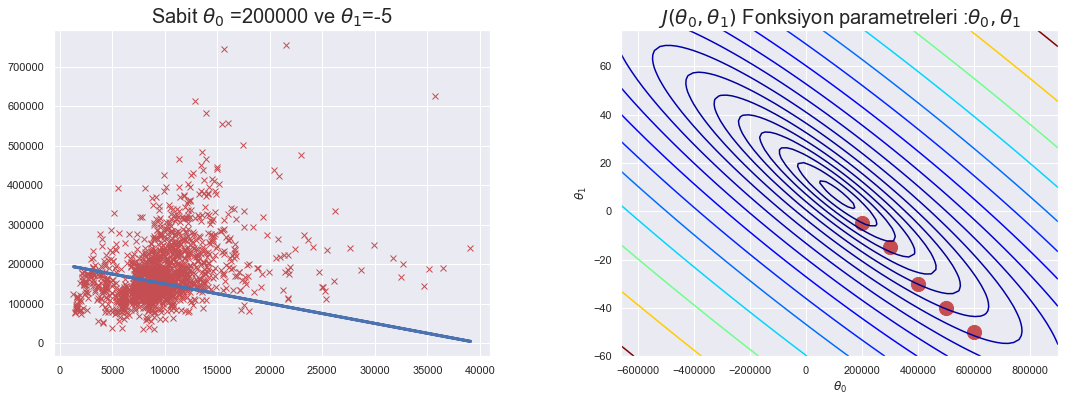

In [45]:
#
y=grafik_verisi[["Konut_Fiyat"]];x=grafik_verisi[["Konut_Boyutu"]];fig = plt.figure(figsize=(18, 6))
fig.subplots_adjust(wspace=0.3);ax1= fig.add_subplot(121);ax2 = fig.add_subplot(122)
t0=200000;t1=- 5;t0_list.append(t0);t1_list.append(t1);ax1.set_title("Sabit "+r'$\theta_0$'+" ={Q0}".format(Q0=t0)+" ve " + r'$\theta_1$'+"={Q1}".format(Q1=t1) ,fontsize="20")
h=t0+t1*x;ax1.plot(x, y, 'rx', markersize=6);ax1.plot(x, h, 'b-',linewidth=3, markersize=6)    ;theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals) # Contour plot:
ax2.set_title(r'$J(\theta_0,\theta_1)$'+ " Fonksiyon parametreleri :"+r'$ \theta_0,\theta_1$',fontsize="20")
ax2.contour( theta0, theta1, J_vals.T, np.logspace(9,12, 20),  cmap='jet');ax2.scatter(t0_list , t1_list, marker='o', color='r', s=200 );ax2.set_xlabel(r'$\theta_0$');ax2.set_ylabel(r'$\theta_1$')

Text(0, 0.5, '$\\theta_1$')

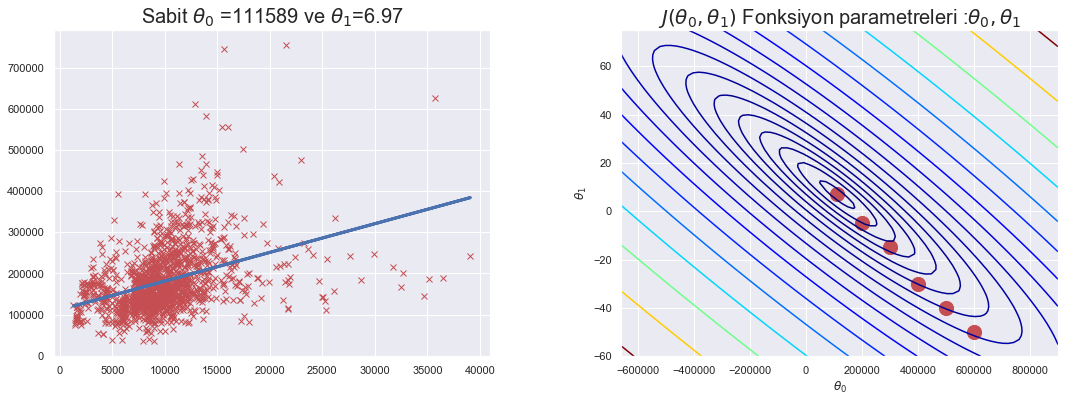

In [46]:
#
y=grafik_verisi[["Konut_Fiyat"]];x=grafik_verisi[["Konut_Boyutu"]];fig = plt.figure(figsize=(18, 6))
fig.subplots_adjust(wspace=0.3);ax1= fig.add_subplot(121);ax2 = fig.add_subplot(122)
t0=111589;t1=6.97;t0_list.append(t0);t1_list.append(t1);ax1.set_title("Sabit "+r'$\theta_0$'+" ={Q0}".format(Q0=t0)+" ve " + r'$\theta_1$'+"={Q1}".format(Q1=t1) ,fontsize="20")
h=t0+t1*x;ax1.plot(x, y, 'rx', markersize=6);ax1.plot(x, h, 'b-',linewidth=3, markersize=6)    ;theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals) # Contour plot:
ax2.set_title(r'$J(\theta_0,\theta_1)$'+ " Fonksiyon parametreleri :"+r'$ \theta_0,\theta_1$',fontsize="20")
ax2.contour( theta0, theta1, J_vals.T, np.logspace(9,12, 20),  cmap='jet');ax2.scatter(t0_list , t1_list, marker='o', color='r', s=200 );ax2.set_xlabel(r'$\theta_0$');ax2.set_ylabel(r'$\theta_1$')
 

### “Yığın” (Batch) Dereceli  Azaltma Algoritması
 

“Yığın”:  Her dereceli azaltma adımında tüm eğitim örnekleri kullanılır.
 

\begin{equation}\label{eq:}
\sum\limits_{i=1}^{m} (h_0(x^{(i)}) -y^{(i)})^2
\end{equation}


In [47]:
print("Sorularınız ?")

Sorularınız ?


In [48]:
print("Teşekkürler...")

Teşekkürler...


In [49]:
 
# from IPython.display import HTML

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
 
 